<a href="https://colab.research.google.com/github/Cassio295/Projetos-DIO/blob/main/Projeto_de_Transfer_Learning_em_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import tensorflow as tf

In [2]:
diretorio_dados = '/content' #Caminho para meus dados
#Url dos dados
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
#Baixando os dados e criando a pasta com os arquivos
dados = tf.keras.utils.get_file(origin = url, extract = True, fname='cats_and_dogs_filtered.zip', cache_dir=diretorio_dados)

68606236/68606236 [==============================] - 3s 0us/step


In [3]:
# Definindo os caminhos para as pastas de treino e teste
caminho_treino    = '/content/datasets/cats_and_dogs_filtered/train'
caminho_validacao = '/content/datasets/cats_and_dogs_filtered/validation'

In [4]:
# Definindo o tamanho das imagens
image_width = 180
image_heigth = 180
image_size = (image_width, image_heigth)


In [5]:
batch_size = 32 #Batch_size representa o números de fetures que eu quero trazer por vez do meu dataset
epochs = 8
larning_rate = 0.0001
class_name = ['cat', 'dog']

In [6]:
# Criando os datasets de treino e teste
from tensorflow.keras.preprocessing.image import ImageDataGenerator
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    caminho_treino,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
    caminho_validacao,
    image_size = image_size,
    batch_size = batch_size
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


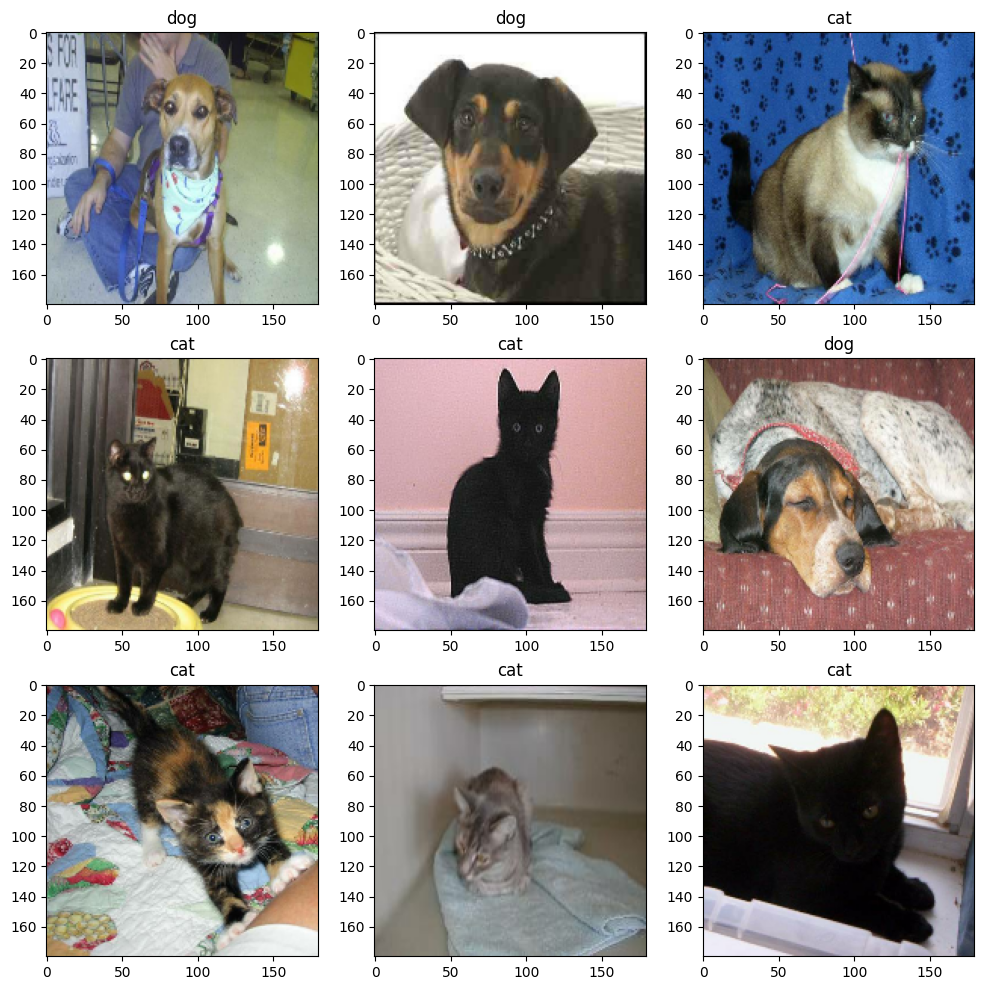

In [7]:
# Plotando algumas imagens da minha base de treino
import matplotlib.pyplot as plt
plt.figure(figsize = (12,12))
for imagem, titulo in dataset_train.take(1):
  for n in range(9):
    plt.subplot(3,3, n + 1)
    plt.imshow(imagem[n].numpy().astype('uint8'))
    plt.title(class_name[titulo[n]])
plt.show()


In [8]:
# Fazendo o Data Argumentation para os dados
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip('horizontal', input_shape = (image_heigth, image_width,3)),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1)
    ]
)

In [9]:
# Carregando o modelo pré treinado
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights ='imagenet', include_top = False, input_shape = (180,180,3))
base_model.trainable = False
base_model.summary()


58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                              

In [10]:
# Criando meu modelo com o transfer laerning

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(
        1. / (255 / 2),
        offset = -1,
        input_shape = image_size + (3,)
    ),
    data_augmentation,
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [11]:
model.compile(tf.keras.optimizers.Adam(learning_rate =0.0001 ),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [12]:
model.fit(dataset_train, validation_data= dataset_validation, epochs= 8)

Epoch 1/8
63/63 [==============================] - 1128s 18s/step - loss: 0.7298 - accuracy: 0.4810 - val_loss: 0.6981 - val_accuracy: 0.5170
Epoch 2/8
63/63 [==============================] - 1123s 18s/step - loss: 0.7097 - accuracy: 0.5040 - val_loss: 0.6773 - val_accuracy: 0.5650
Epoch 3/8
63/63 [==============================] - 1120s 18s/step - loss: 0.6897 - accuracy: 0.5455 - val_loss: 0.6586 - val_accuracy: 0.6270
Epoch 4/8
63/63 [==============================] - 1128s 18s/step - loss: 0.6860 - accuracy: 0.5625 - val_loss: 0.6414 - val_accuracy: 0.6750
Epoch 5/8
63/63 [==============================] - 1122s 18s/step - loss: 0.6642 - accuracy: 0.6145 - val_loss: 0.6248 - val_accuracy: 0.7280
Epoch 6/8
63/63 [==============================] - 1189s 19s/step - loss: 0.6585 - accuracy: 0.6040 - val_loss: 0.6089 - val_accuracy: 0.7570
Epoch 7/8
63/63 [==============================] - 1132s 18s/step - loss: 0.6372 - accuracy: 0.6495 - val_loss: 0.5942 - val_accuracy: 0.7770
Epoch 

In [24]:
# Agora vou testar minha rede
from tensorflow.keras.preprocessing import image
import numpy as np
caminho_imagem = '/content/WhatsApp Image 2024-03-24 at 19.07.27.jpeg'
caminho_imagem2 = '/content/WhatsApp Image 2024-03-24 at 7.07.27 PM.jpeg'
# Tratando a primeira imagem de gato para teste
cat = image.load_img(caminho_imagem, target_size = (180,180))
cat_array = image.img_to_array(cat)
cat_array = np.expand_dims(cat_array, axis = 0)
cat_array / 255.
# Tratando a segunda imagem de gato para teste
cat2 = image.load_img(caminho_imagem2, target_size = (180,180))
cat2_array = image.img_to_array(cat2)
cat2_array = np.expand_dims(cat2_array, axis = 0)
cat2_array / 255
# Fazer a previsões





1/1 [==============================] - 0s 352ms/step


In [47]:
predict = model.predict(cat2_array)
if predict < 0.6:
  print('Gato', predict)
else:
  print('Cachorro', predict)

1/1 [==============================] - 0s 340ms/step
Cachorro [[0.61074615]]
